# Viral Data Analysis

Date: 2020.11.02

Author: © 2020 Tadas Laurinaitis 

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from https://ourworldindata.org/ to answer the following questions:

1. What countries have most total tests per thousand from the top 50 countries with the highest GDP per capita?
1. Is there a correlation between total deaths per million and total tests per thousand in the 5 European and 5 Asian countries with the highest GDP per capita?

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Load the data

In [90]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt

Download the data to cache locally. Do this once (a day), and comment out, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [91]:
import requests
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)

12501481

Load the file to Pandas.

In [92]:
#url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
url = "owid-covid-data.csv" 
df = pd.read_csv(url, parse_dates=[3])

Check the columns available.

In [93]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_p

The columns are explained [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

## 1. What countries have most total tests per thousand from the top 50 countries with the highest GDP per capita?

To find countries with most total tests per thousand from the top 50 countries with the highest GPD per capita, we first must copy the data from the original dataframe, choose a particular date and columns needed. We then sort the data by gdp per capita and select top 50 results. We then sort the data by total tests per thousand and select top 10 results.

In [94]:
allData = df.copy()
relevantData = allData[allData['date'] == "2020-10-25"][['location', 'date', 'gdp_per_capita', 'total_tests_per_thousand']]
relevantData = relevantData.dropna()
relevantCountries = relevantData.sort_values(by=["gdp_per_capita"], ascending = False).head(50)
relevantCountries = relevantCountries.sort_values(by=["total_tests_per_thousand"], ascending = False).head(10)
relevantCountries

,location,date,gdp_per_capita,total_tests_per_thousand
30657,Luxembourg,2020-10-25,94277.965,1612.159
1763,United Arab Emirates,2020-10-25,67293.483,1260.382
5460,Bahrain,2020-10-25,43290.705,986.638
13688,Denmark,2020-10-25,46682.515,848.784
24912,Israel,2020-10-25,33132.320,538.812
12310,Cyprus,2020-10-25,32415.132,532.896
24604,Iceland,2020-10-25,46482.958,511.886
50658,United States,2020-10-25,54225.446,436.265
18078,United Kingdom,2020-10-25,39753.244,406.550
3990,Belgium,2020-10-25,42658.576,399.008


As seen in the results, Luxembourg is the leading country both in GDP per capita and total tests per thousand. United Arab Emirates are also high on the GDP per capita list and while their total tests per thousand count is slightly lower that that of Luxembourg's it is still very high compare to the other countries on the list. Countries ranked 5-10 on the list have total test counts several times lower than those of Luxembourg's and UAE's.

<a id='Q1'></a>
## 2. Is there a correlation between total deaths per million and total tests per thousand in the 5 European and 5 Asian countries with the highest GDP per capita?


To compare total deaths per million and total tests per thousand of 5 European and 5 Asian countries with the highest gdp per capita, we firstly copy the main dataframe, then select a particular date, where this data exists, f.e. "2020-10-25", then filter the copied dataframe and select only data where continent is Europe or Asia. Then we select top 5 countries from both Europe and Asia by sorting the dataframe by "gdp_per_capita" and selecting the top 5 results.

In [95]:
allData = df.copy()
relevantData = allData[allData['date'] == "2020-10-25"][['continent', 'location', 'date', 'gdp_per_capita', 'total_deaths_per_million', 'total_tests_per_thousand']]
relevantData = relevantData.dropna()

europenData = relevantData[relevantData['continent'] == "Europe"]
relevantEuropeanCountries = europenData.sort_values(by=["gdp_per_capita"], ascending = False).head(5)
asianData = relevantData[relevantData['continent'] == "Asia"]
relevantAsianCountries = asianData.sort_values(by=["gdp_per_capita"], ascending = False).head(5)

frames = [relevantEuropeanCountries, relevantAsianCountries]
result = pd.concat(frames)
result = result.sort_values(by=["gdp_per_capita"], ascending = False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)
pd.set_option('display.max_colwidth', None)
print(result)

      continent              location       date  gdp_per_capita  total_deaths_per_million  total_tests_per_thousand
30657    Europe            Luxembourg 2020-10-25       94277.965                   230.041                  1612.159
23680    Europe               Ireland 2020-10-25       67335.293                   381.142                   314.817
1763       Asia  United Arab Emirates 2020-10-25       67293.483                    48.026                  1260.382
28084      Asia                Kuwait 2020-10-25       65530.537                   174.216                   205.184
37491    Europe                Norway 2020-10-25       64800.057                    51.464                   291.937
8999     Europe           Switzerland 2020-10-25       57410.166                   216.763                   209.423
42573      Asia          Saudi Arabia 2020-10-25       49045.411                   151.692                   223.264
13688    Europe               Denmark 2020-10-25       46682.515

As we can see from the results, high gdp per capita doesn't automatically mean that there is going to be a high number of tests and a low number of deaths per million. Luxembourg while having the highest gdp per capita and being the highest testing country on this list, still suffered a high number of casualties. On the other hand, Japan having lowest gdp per capita on this list suffered lowest casualties and didn't do as many tests as the other countries from this list. 

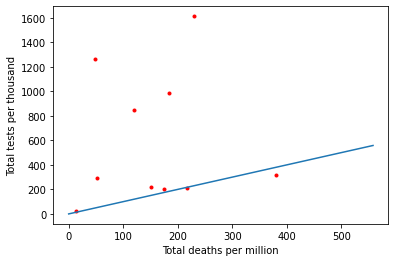

In [96]:
totalDeathsColumn = result.total_deaths_per_million
totalTestsColumn = result.total_tests_per_thousand
plt.plot(totalDeathsColumn, totalTestsColumn, 'r.')
plt.xlabel('Total deaths per million')
plt.ylabel('Total tests per thousand')

p = ma.polyfit(totalDeathsColumn, totalTestsColumn, 1)
plt.plot(p, p, '-')

In [97]:
ma.corrcoef(totalDeathsColumn, totalTestsColumn)[0,1]

0.050010375262076086

As it is seen from the plot and the correlation coeficient there is a slight correlation between total tests per thousand and total deaths per million, as the more tests are done, the more covid cases are found as the cause of death.